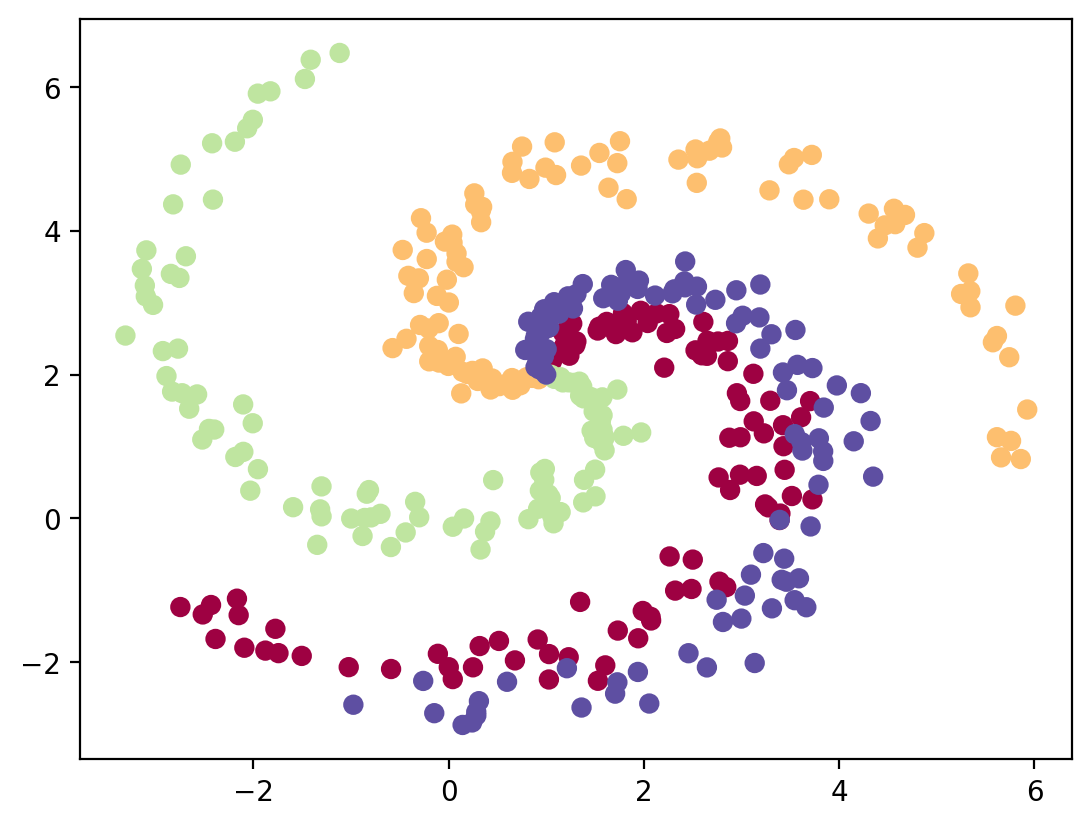

In [5]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

N = 100 # number of points per class
D = 2 # dimensionality
K = 4 #3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]*5+[1,2]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [6]:
#y[1]=2 # intentionally changing a class label

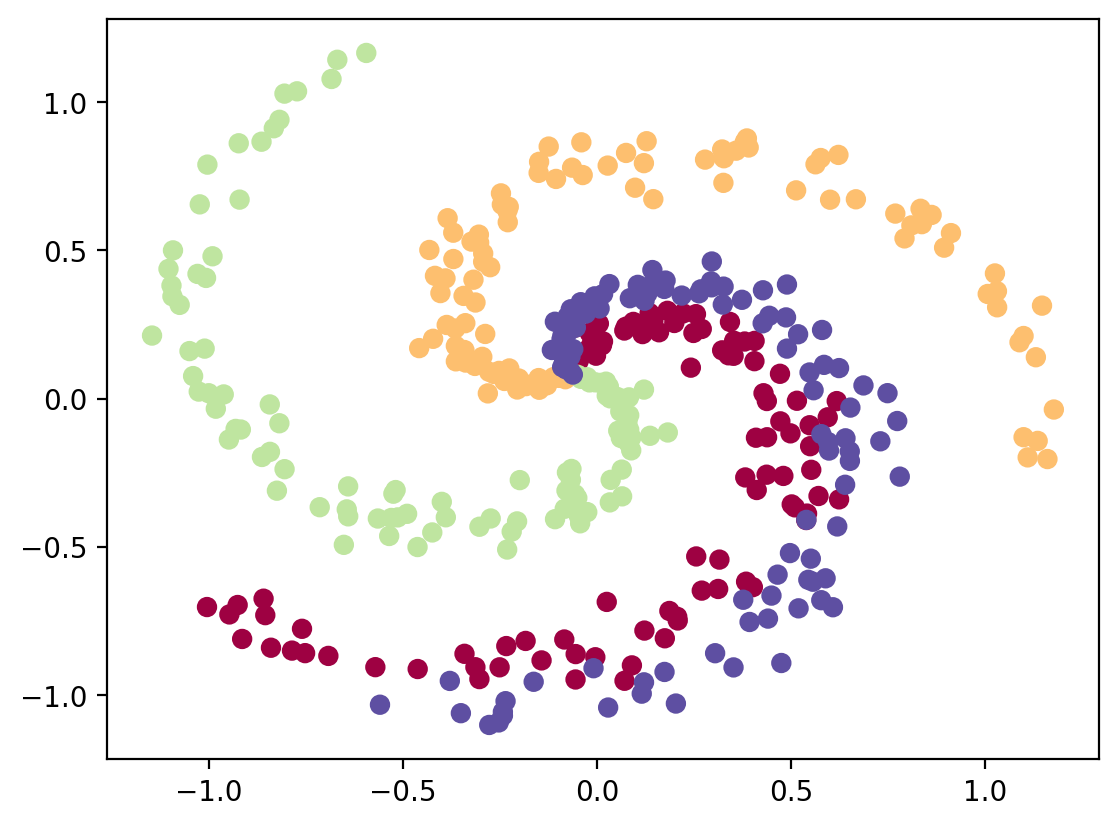

In [7]:
mean_x = np.mean(X[:, 0])
#print(mean_x)
mean_y = np.mean(X[:, 1])
#print(mean_y)

std_x = np.std(X[:, 0])
#print(std_x)
std_y = np.std(X[:, 1])
#print(std_y)

X[:, 0] = (X[:, 0]-mean_x)/(2.0*std_x)
X[:, 1] = (X[:, 1]-mean_y)/(2.0*std_y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [8]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K) # D = 2 is the dimensionality and K = 4 is the number of classes
b = np.zeros((1,K))

In [9]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [10]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print(num_examples)
#print(exp_scores)
print(probs)

400
[[0.25001375 0.25002319 0.24989153 0.25007153]
 [0.25001846 0.25002602 0.24988035 0.25007518]
 [0.25002253 0.25002899 0.249868   0.25008048]
 ...
 [0.24951431 0.24976407 0.25086896 0.24985265]
 [0.24950446 0.24976383 0.25086349 0.24986823]
 [0.24945438 0.24979971 0.25064751 0.2500984 ]]


In [11]:
correct_logprobs = -np.log(probs[range(num_examples),y])
print(correct_logprobs)


[1.38623936 1.38622053 1.38620426 1.38618265 1.38615142 1.38614523
 1.38611279 1.38607763 1.3860573  1.386035   1.3860072  1.38598427
 1.38597741 1.38598892 1.38592935 1.38590442 1.38586892 1.38584514
 1.38583622 1.38579922 1.38578194 1.38578083 1.38573876 1.38570847
 1.3858739  1.38569031 1.38564698 1.38568814 1.38561624 1.38564424
 1.38558432 1.38569729 1.38570513 1.38569343 1.38561476 1.38552927
 1.3855891  1.38566289 1.38555803 1.38580256 1.38583341 1.38605285
 1.3856565  1.38601938 1.38590051 1.38628746 1.38574816 1.38593402
 1.38621372 1.38632017 1.38583868 1.38617328 1.38594537 1.38574736
 1.38563878 1.38606402 1.38683153 1.38629691 1.38630328 1.3867831
 1.38617881 1.38630136 1.38633698 1.38731566 1.3861388  1.38699224
 1.3869381  1.38682264 1.38718769 1.38683182 1.38719581 1.38721336
 1.38735845 1.38762802 1.3877435  1.38734122 1.3878239  1.38767152
 1.38763296 1.38779945 1.38798055 1.38757294 1.38795214 1.38801915
 1.38780302 1.38767299 1.38806928 1.38818973 1.38825837 1.38830

In [12]:
# compute the loss: average cross-entropy loss and regularization

# some hyperparameters
step_size = 1e-2
reg = 1e-3 # regularization strength

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
print(loss)

1.3867436934049049


In [13]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples
# in total, that's
# dscores = (probs - 1)/ (num_examples)
print(dscores)

[[-0.00187497  0.00062506  0.00062473  0.00062518]
 [-0.00187495  0.00062507  0.0006247   0.00062519]
 [-0.00187494  0.00062507  0.00062467  0.0006252 ]
 ...
 [ 0.00062379  0.00062441  0.00062717 -0.00187537]
 [ 0.00062376  0.00062441  0.00062716 -0.00187533]
 [ 0.00062364  0.0006245   0.00062662 -0.00187475]]


In [14]:
# derivative loss function

dW = np.dot(X.T, dscores)
dW += reg*W # don't forget the regularization gradient

# in total, that's
# dW=np.dot(X.T, dscores) + reg*W

db = np.sum(dscores, axis=0, keepdims=True)

In [15]:
# perform a parameter update
W += -step_size * dW
b += -step_size * db

print('step_size: ', step_size)

step_size:  0.01


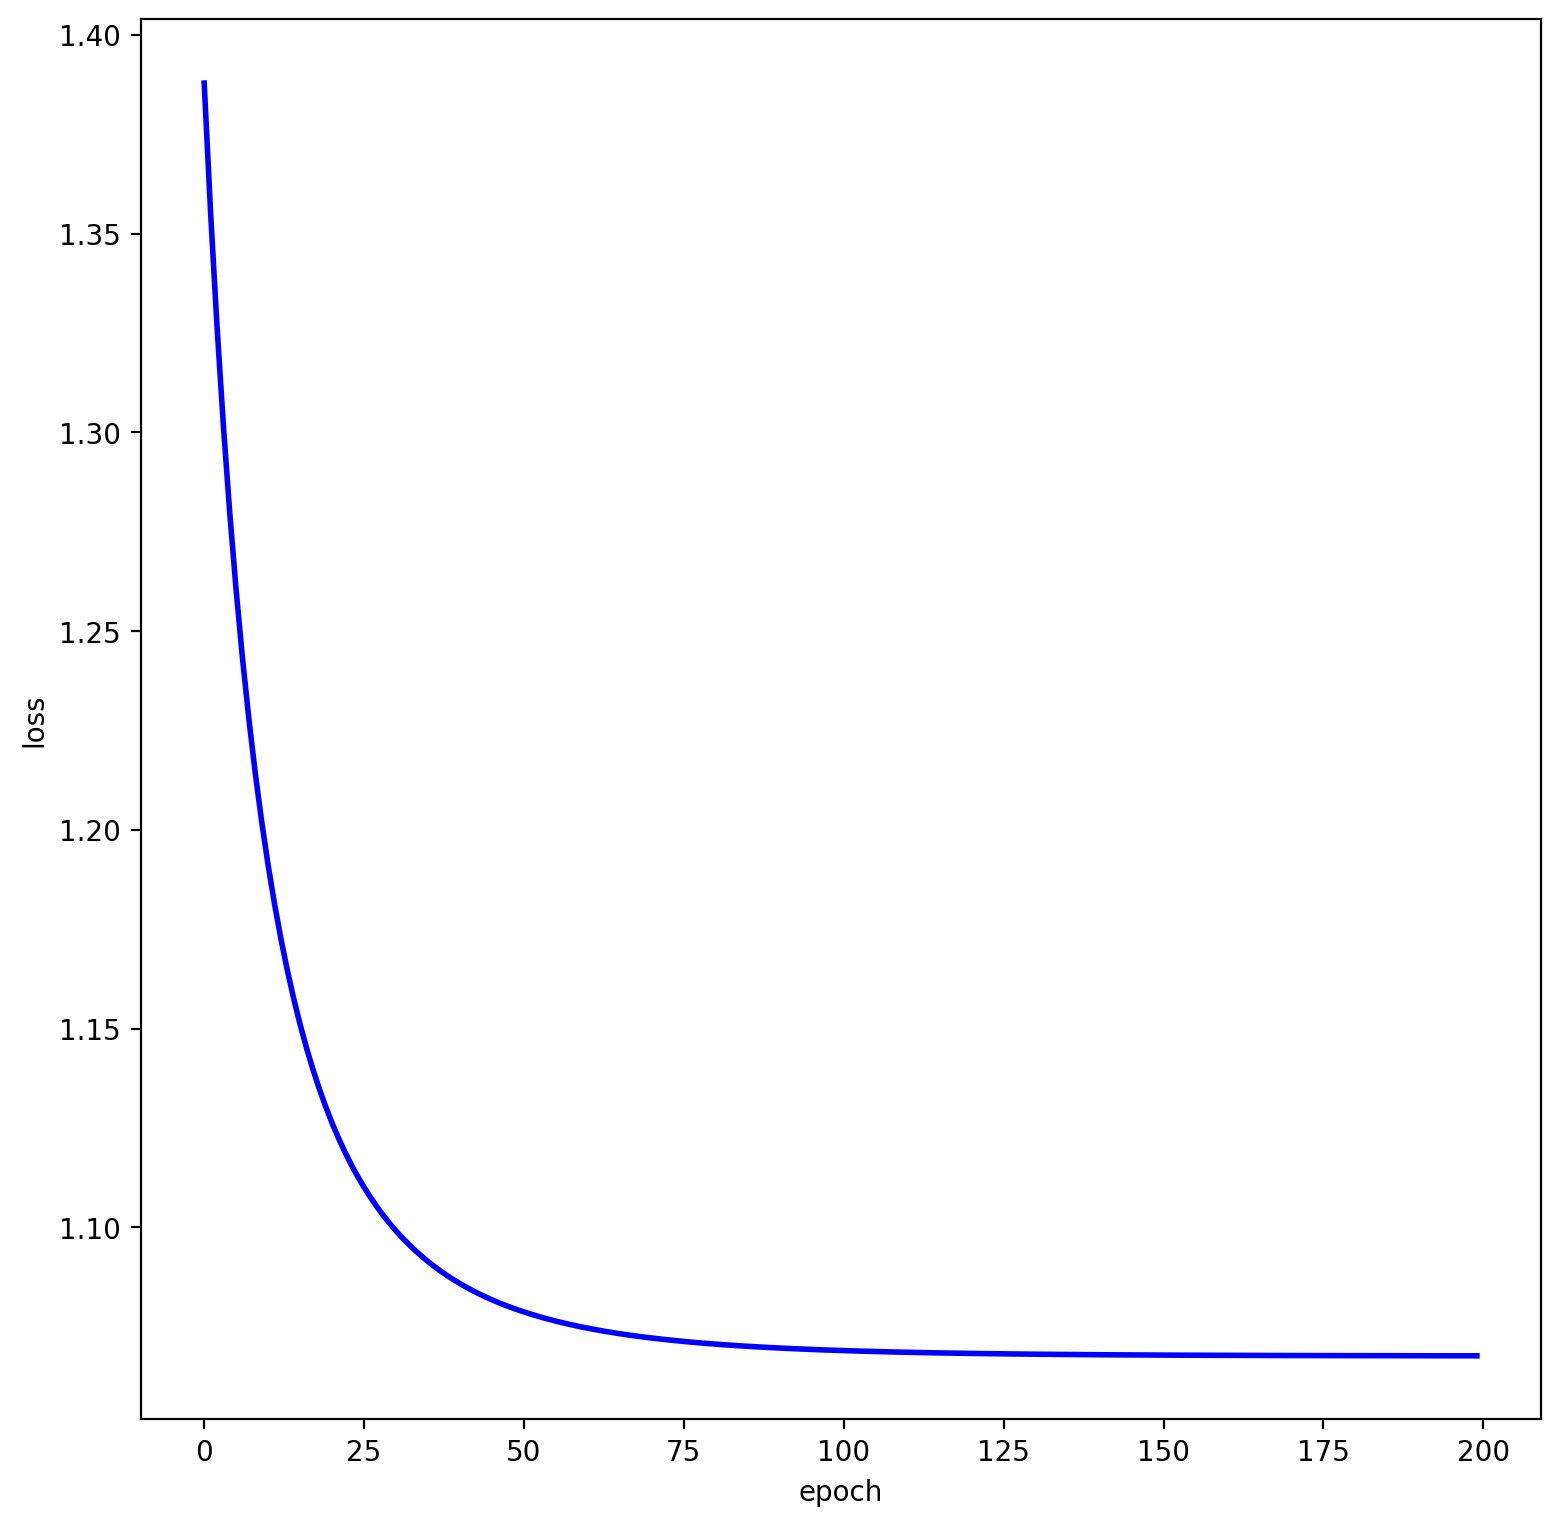

In [16]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]

epoch_vector = []
loss_vector = []

for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  #if i % 10 == 0:
  #  print ("iteration %d: loss %f" % (i, loss))
    
  epoch_vector.append(i)
  loss_vector.append(loss)    

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0,0,1,1])
ax.plot(epoch_vector,loss_vector, '-b', lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()
  

In [17]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))
#print('predicted_class: ',predicted_class)

training accuracy: 0.39


(-2.101237898735586, 2.158762101264417)

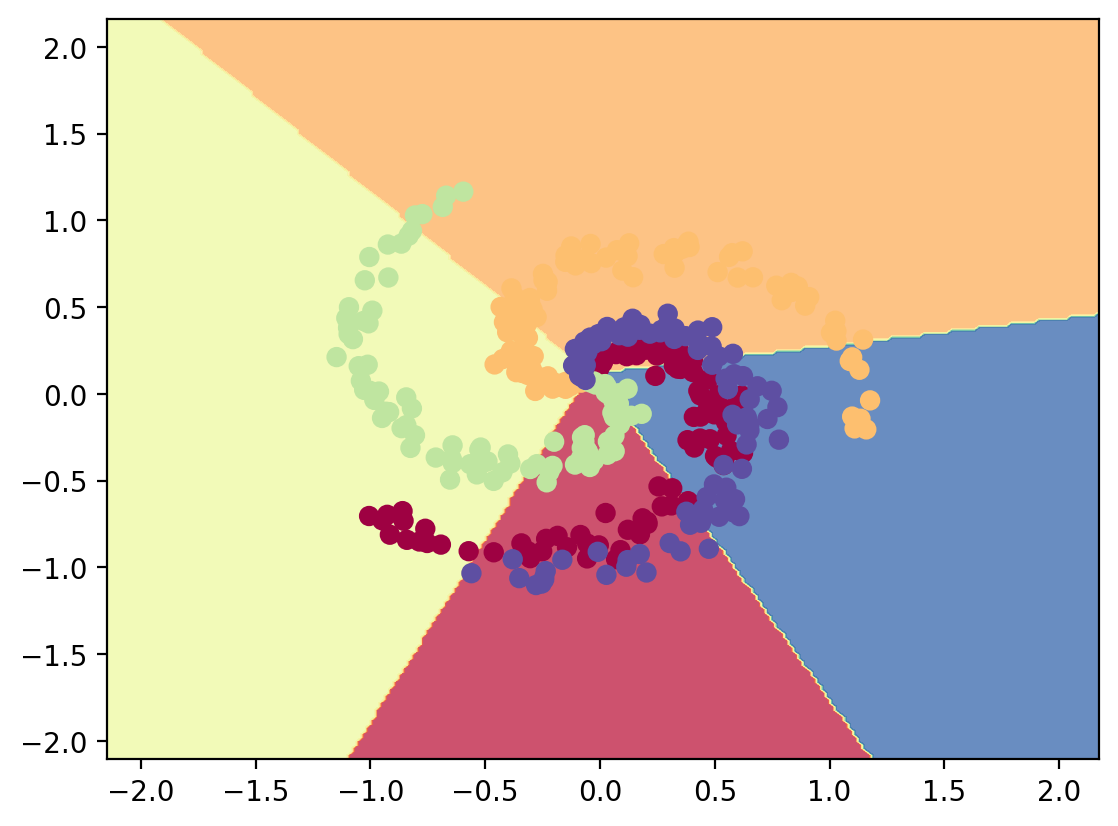

In [18]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [19]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

# this is new
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))


In [20]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [21]:
# backpropate the gradient to the parameters

# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [22]:
dhidden = np.dot(dscores, W2.T)
print(dhidden.shape) #100 rows, 400 columns
# the activation function follows in the next code block

(400, 100)


In [23]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0 #if smaller than or equal 0, set 0

# because the derivative of the activation function phi is multipicative; the complete equation would be:
# factor[hidden_layer <= 0] = 0
#factor [hidden_layer > 0] = 1.0
# dhidden = dhidden * factor

In [24]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [25]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

epoch_vector = []
loss_vector = []

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  #if i % 1000 == 0:
  #  print ("iteration %d: loss %f" % (i, loss))
  epoch_vector.append(i)
  loss_vector.append(loss)

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

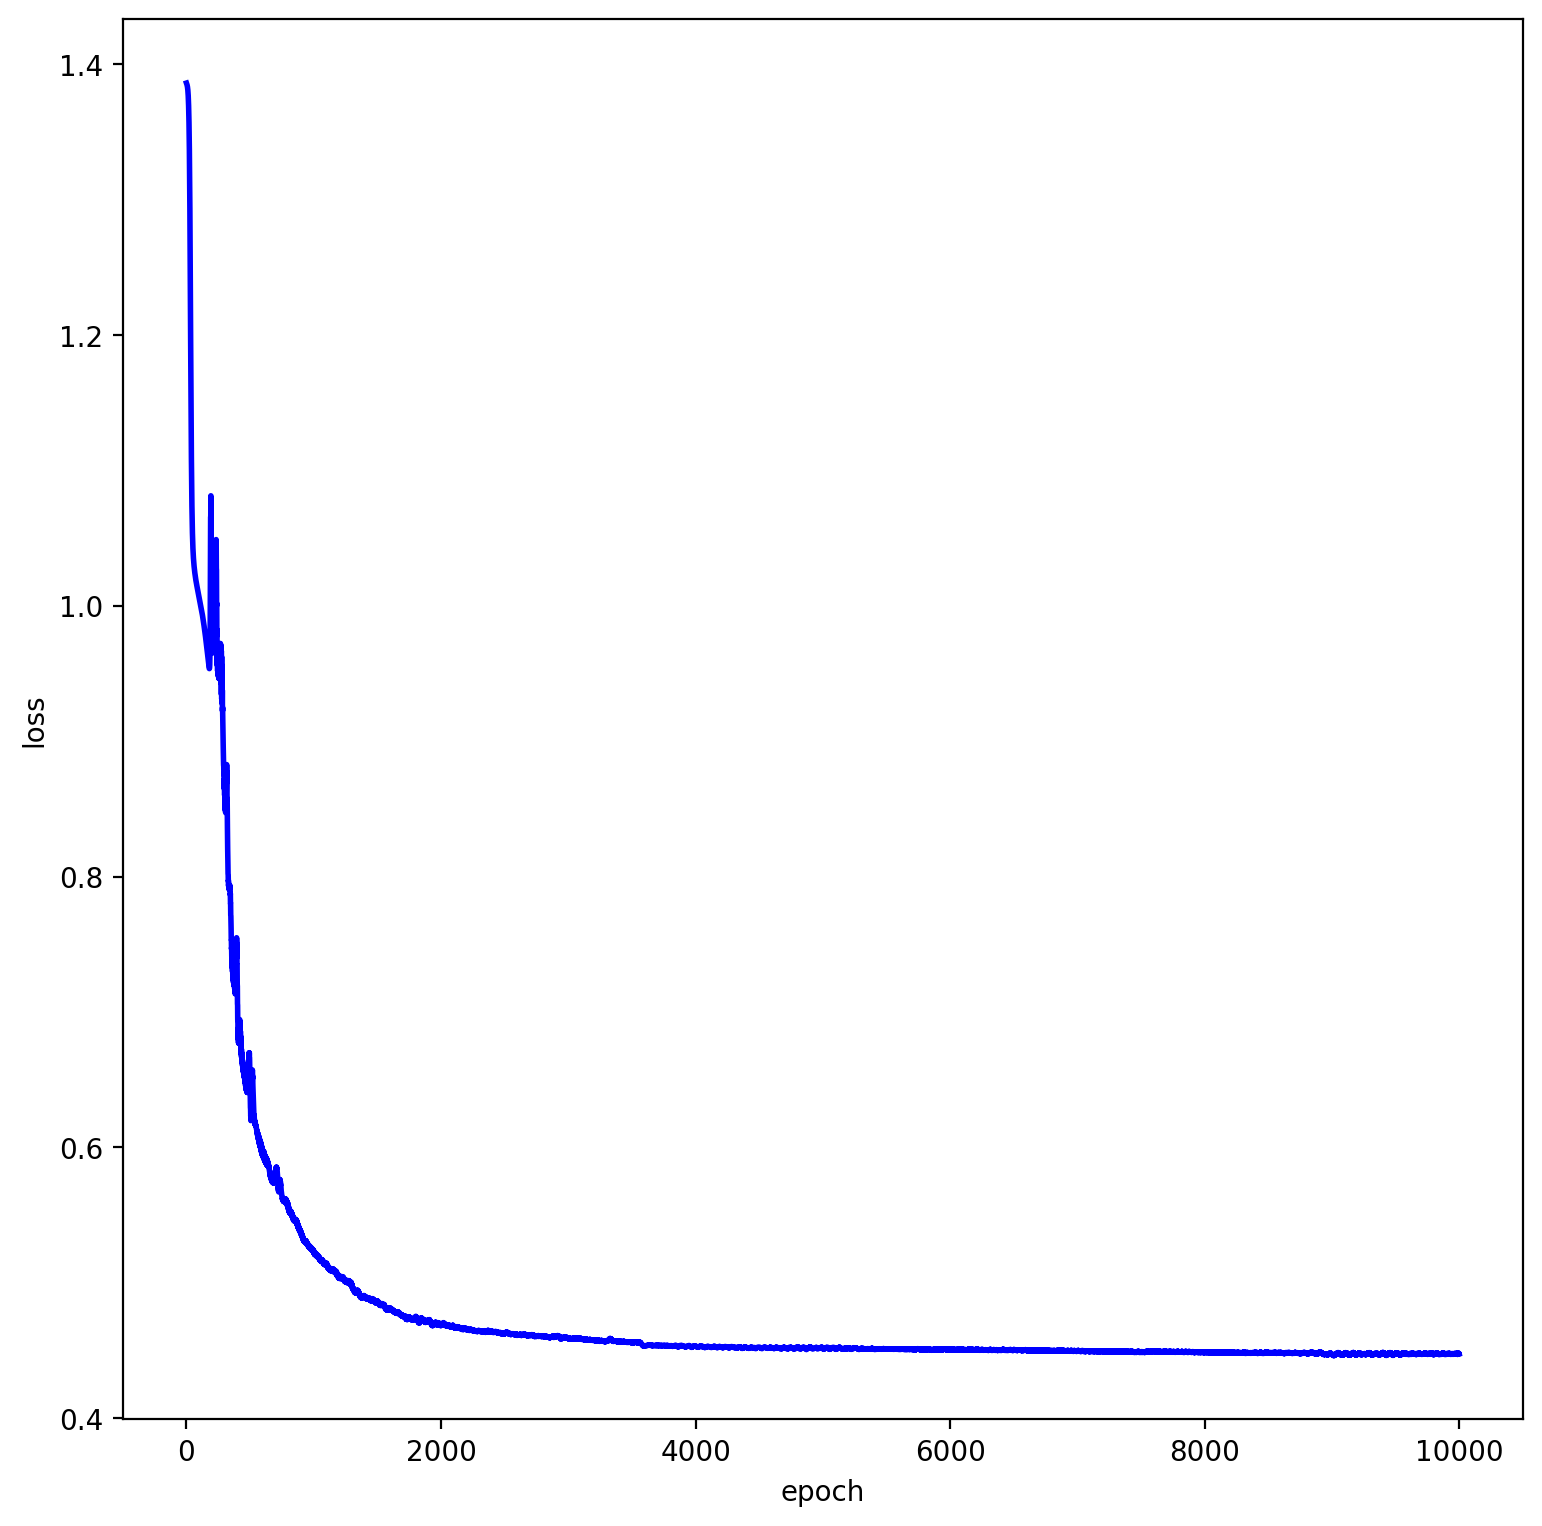

In [26]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0,0,1,1])
ax.plot(epoch_vector,loss_vector, '-b', lw=2)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [27]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.92


(-2.101237898735586, 2.158762101264417)

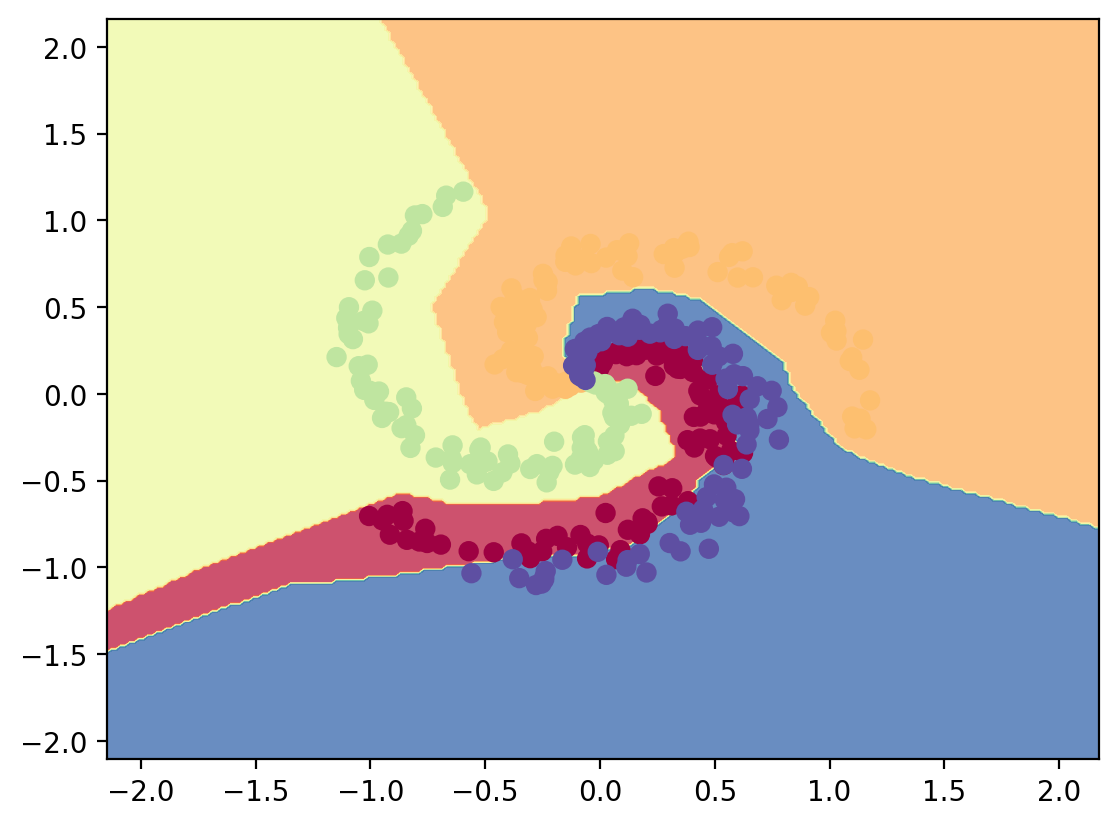

In [28]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

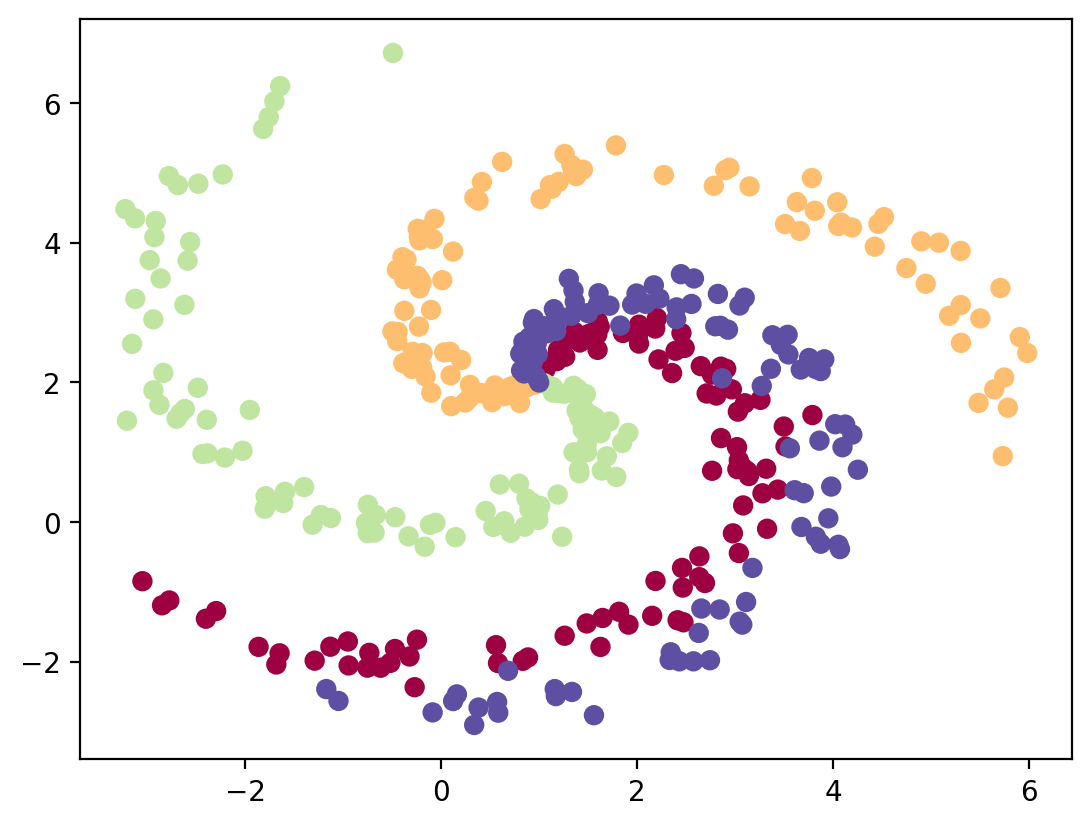

In [29]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 4 #3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]*5+[1,2]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

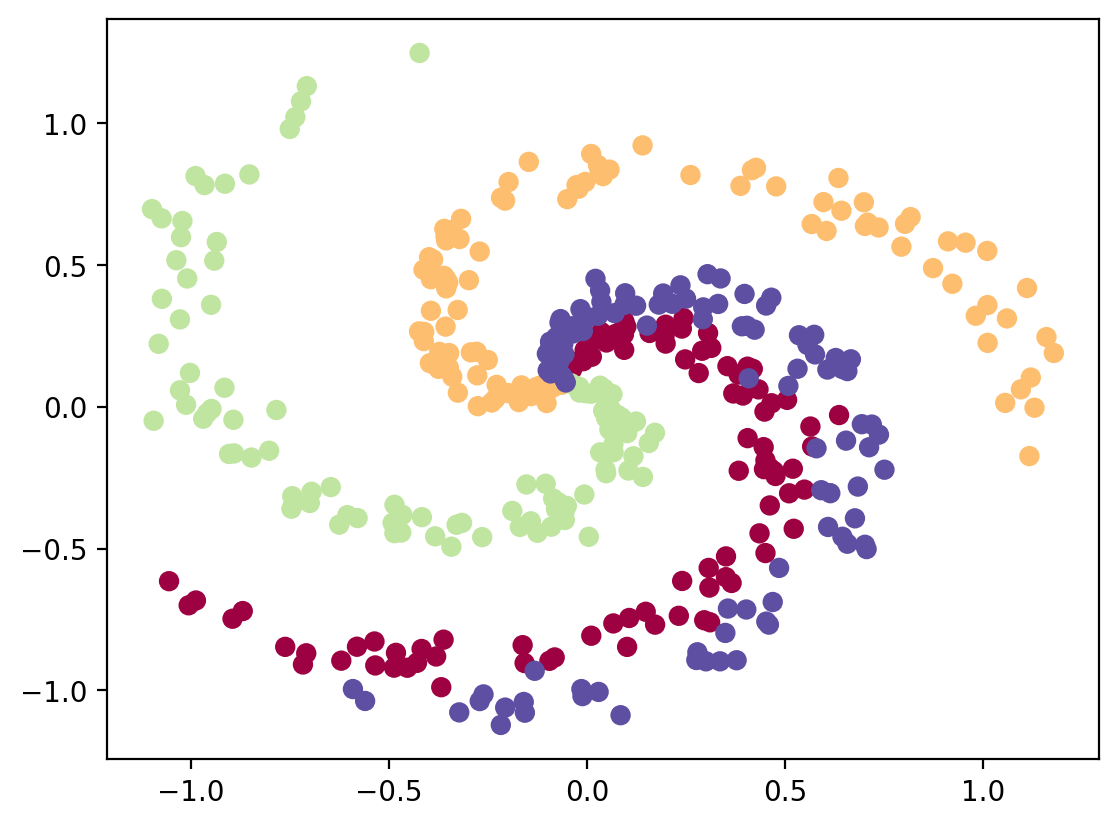

In [30]:
mean_x = np.mean(X[:, 0])
#print(mean_x)
mean_y = np.mean(X[:, 1])
#print(mean_y)

std_x = np.std(X[:, 0])
#print(std_x)
std_y = np.std(X[:, 1])
#print(std_y)

X[:, 0] = (X[:, 0]-mean_x)/(2.0*std_x)
X[:, 1] = (X[:, 1]-mean_y)/(2.0*std_y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [31]:
# short and quick - as we (of course) reuse the weights and biases we trained (!) before
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('classification accuracy: %.2f' % (np.mean(predicted_class == y)))

classification accuracy: 0.91


# Try it out

1. One wrong label in training set

In [32]:
# Keeping an immutable copy
y_clean = y.copy()

# Flipping exactly one label 
y_noisy = y_clean.copy()
y_noisy[0] = (y_noisy[0] + 1) % K  # change class

# Train the SAME 2-layer net but with y_noisy instead of y
def train_two_layer(X, y_labels, hidden=100, lr=1e-0, reg=1e-3, epochs=5000):
    N, D = X.shape
    W  = 0.01*np.random.randn(D, hidden); b  = np.zeros((1, hidden))
    W2 = 0.01*np.random.randn(hidden, K);  b2 = np.zeros((1, K))
    loss_hist = []
    for i in range(epochs):
        hidden_layer = np.maximum(0, X@W + b)
        scores = hidden_layer@W2 + b2
        exp_scores = np.exp(scores - scores.max(axis=1, keepdims=True))  # stable softmax
        probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
        correct_logprobs = -np.log(probs[np.arange(N), y_labels])
        data_loss = correct_logprobs.mean()
        reg_loss = 0.5*reg*(np.sum(W*W)+np.sum(W2*W2))
        loss = data_loss + reg_loss
        loss_hist.append(loss)

        dscores = probs
        dscores[np.arange(N), y_labels] -= 1
        dscores /= N
        dW2 = hidden_layer.T @ dscores + reg*W2
        db2 = dscores.sum(axis=0, keepdims=True)
        dhidden = dscores @ W2.T
        dhidden[hidden_layer <= 0] = 0
        dW = X.T @ dhidden + reg*W
        db = dhidden.sum(axis=0, keepdims=True)

        W  -= lr*dW; b  -= lr*db
        W2 -= lr*dW2; b2 -= lr*db2
    return (W, b, W2, b2, loss_hist)

Wn, bn, W2n, b2n, loss_noisy = train_two_layer(X, y_noisy, epochs=5000)

# Compare accuracies
def acc(W, b, W2, b2, X, y_true):
    h = np.maximum(0, X@W + b)
    s = h@W2 + b2
    pred = np.argmax(s, axis=1)
    return (pred == y_true).mean()

Wc, bc, W2c, b2c, loss_clean = train_two_layer(X, y_clean, epochs=5000)
print("Clean labels acc:", acc(Wc, bc, W2c, b2c, X, y_clean))
print("One flipped label acc:", acc(Wn, bn, W2n, b2n, X, y_clean))


Clean labels acc: 0.8725
One flipped label acc: 0.9225


With just one wrong label, the model usually still fits well but the final loss is slightly higher.

2) Train longer vs. shorter

In [33]:
W_s, b_s, W2_s, b2_s, loss_short = train_two_layer(X, y, epochs=700)
W_l, b_l, W2_l, b2_l, loss_long  = train_two_layer(X, y, epochs=50000)

print("700 epochs acc :", acc(W_s, b_s, W2_s, b2_s, X, y))
print("50000 epochs acc:", acc(W_l, b_l, W2_l, b2_l, X, y))


700 epochs acc : 0.7725
50000 epochs acc: 0.915


Short training results in underfit (lower accuracy). Very long training weak regularization ends in overfitting on noisier data.

3) Modified activation functions

In [34]:
def activation(name, Z):
    if name == "relu":
        return np.maximum(0, Z), (Z > 0).astype(Z.dtype)
    if name == "leaky_relu":
        alpha = 0.01
        return np.where(Z>0, Z, alpha*Z), np.where(Z>0, 1.0, alpha)
    if name == "tanh":
        A = np.tanh(Z)
        return A, 1 - A*A
    if name == "sigmoid":
        A = 1/(1 + np.exp(-Z))
        return A, A*(1 - A)
    raise ValueError("unknown activation")

def train_with_activation(X, y, act="relu", hidden=100, lr=1e-0, reg=1e-3, epochs=5000):
    N, D = X.shape
    W  = 0.01*np.random.randn(D, hidden); b  = np.zeros((1, hidden))
    W2 = 0.01*np.random.randn(hidden, K);  b2 = np.zeros((1, K))
    for i in range(epochs):
        Z = X@W + b
        H, Hprime = activation(act, Z)
        scores = H@W2 + b2
        exp_scores = np.exp(scores - scores.max(axis=1, keepdims=True))
        probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)

        # loss
        correct_logprobs = -np.log(probs[np.arange(N), y])
        data_loss = correct_logprobs.mean()
        reg_loss = 0.5*reg*(np.sum(W*W)+np.sum(W2*W2))
        loss = data_loss + reg_loss

        # grads
        dscores = probs
        dscores[np.arange(N), y] -= 1
        dscores /= N
        dW2 = H.T @ dscores + reg*W2
        db2 = dscores.sum(axis=0, keepdims=True)
        dH = dscores @ W2.T
        dZ = dH * Hprime
        dW = X.T @ dZ + reg*W
        db = dZ.sum(axis=0, keepdims=True)

        # step
        W  -= lr*dW; b  -= lr*db
        W2 -= lr*dW2; b2 -= lr*db2
    return W, b, W2, b2

for act in ["relu", "leaky_relu", "tanh", "sigmoid"]:
    W_, b_, W2_, b2_ = train_with_activation(X, y, act=act, epochs=5000)
    print(f"{act:10s} acc:", acc(W_, b_, W2_, b2_, X, y))


relu       acc: 0.92
leaky_relu acc: 0.8775
tanh       acc: 0.2475
sigmoid    acc: 0.3725


ReLU and leaky ReLU gives good results, while tanh and sigmoid suffers.

5) No activation function 

In [35]:
def train_linear_linear(X, y, hidden=100, lr=1e-0, reg=1e-3, epochs=5000):
    N, D = X.shape
    W  = 0.01*np.random.randn(D, hidden); b  = np.zeros((1, hidden))
    W2 = 0.01*np.random.randn(hidden, K);  b2 = np.zeros((1, K))
    for i in range(epochs):
        H = X@W + b            # NO nonlinearity
        scores = H@W2 + b2
        exp_scores = np.exp(scores - scores.max(axis=1, keepdims=True))
        probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
        correct_logprobs = -np.log(probs[np.arange(N), y])
        data_loss = correct_logprobs.mean()
        reg_loss = 0.5*reg*(np.sum(W*W)+np.sum(W2*W2))

        dscores = probs
        dscores[np.arange(N), y] -= 1
        dscores /= N
        dW2 = H.T @ dscores + reg*W2
        db2 = dscores.sum(axis=0, keepdims=True)
        dH = dscores @ W2.T
        dW = X.T @ dH + reg*W
        db = dH.sum(axis=0, keepdims=True)

        W  -= lr*dW; b  -= lr*db
        W2 -= lr*dW2; b2 -= lr*db2
    return W, b, W2, b2

Wlin, blin, W2lin, b2lin = train_linear_linear(X, y, epochs=5000)
print("No activation acc:", acc(Wlin, blin, W2lin, b2lin, X, y))


No activation acc: 0.37


accuracy similar to linear softmax

6) More complex datasets 2D

In [36]:
def make_rings(n_per_ring=100, n_rings=3, noise=0.05):
    radii = np.linspace(0.6, 2.0, n_rings)
    Xs, ys = [], []
    for i, r in enumerate(radii):
        theta = np.linspace(0, 2*np.pi, n_per_ring, endpoint=False)
        X_ring = np.c_[r*np.cos(theta), r*np.sin(theta)]
        X_ring += noise*np.random.randn(*X_ring.shape)
        Xs.append(X_ring); ys.append(np.full(n_per_ring, i))
    X = np.vstack(Xs)
    y = np.concatenate(ys).astype('uint8')
    return X, y

Xr, yr = make_rings(150, 4, noise=0.08)
# scale
Xr = (Xr - Xr.mean(axis=0))/(2.0*Xr.std(axis=0))
Kr = len(np.unique(yr))
K_backup = K; K = Kr  # reusing training functions that close over K
Wr, br, W2r, b2r, _ = train_two_layer(Xr, yr, epochs=8000)
print("Rings acc:", acc(Wr, br, W2r, b2r, Xr, yr))
K = K_backup


Rings acc: 0.9916666666666667


Visualizing the rings dataset itself

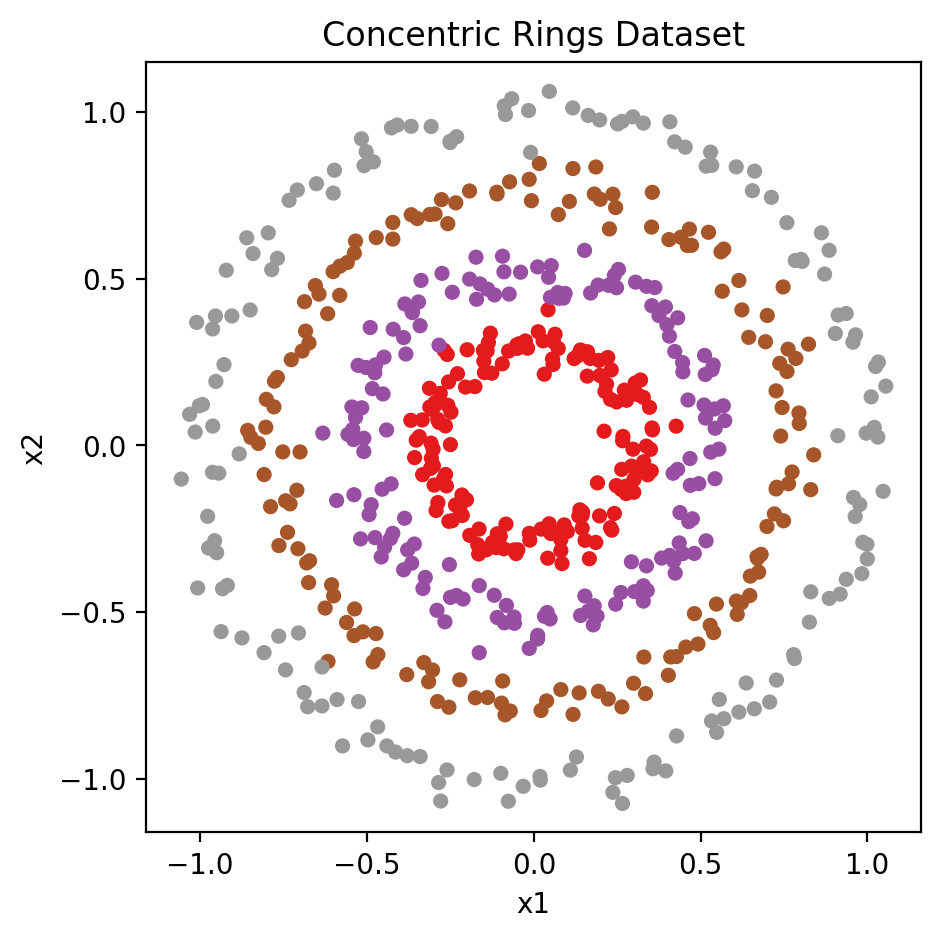

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Xr[:, 0], Xr[:, 1], c=yr, cmap=plt.cm.Set1, s=20)
plt.title("Concentric Rings Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()


Visualizing the decision boundary

In [39]:
def plot_decision_boundary_2layer(W1, b1, W2, b2, X, y, title="Decision boundary"):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.02

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Forward pass for predictions
    hidden = np.maximum(0, grid.dot(W1) + b1)   # ReLU
    scores = hidden.dot(W2) + b2
    Z = np.argmax(scores, axis=1)

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k', s=20)
    plt.title(title)
    plt.axis("equal")
    plt.show()


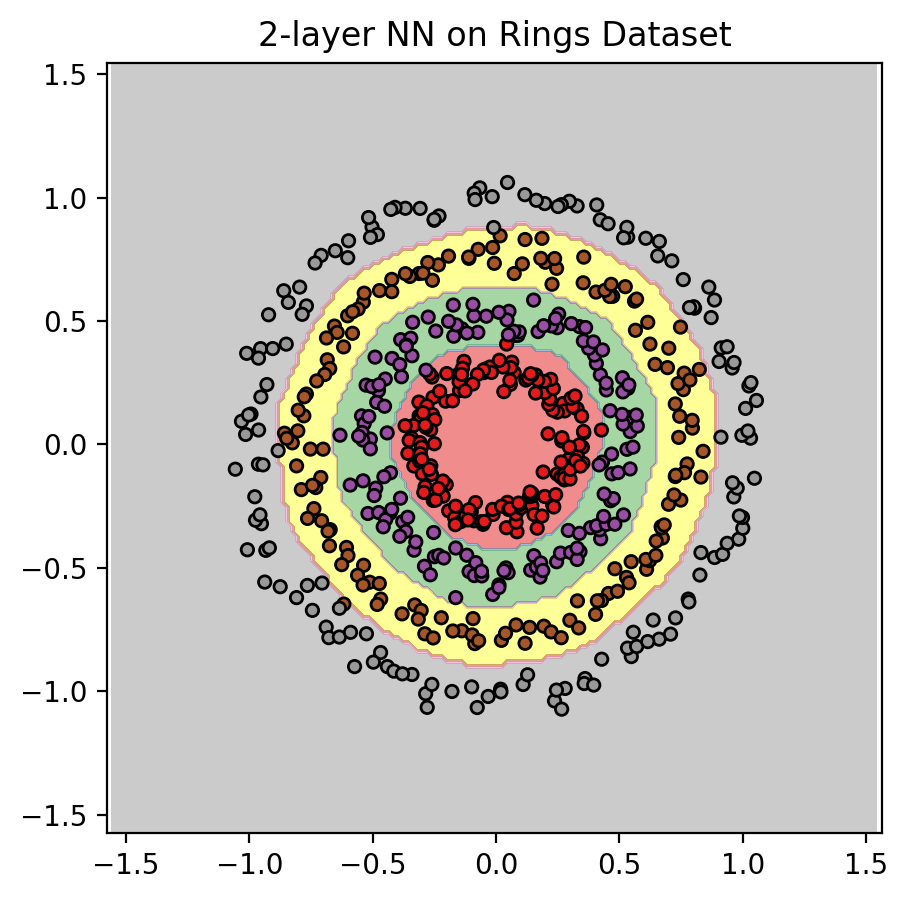

In [40]:
plot_decision_boundary_2layer(Wr, br, W2r, b2r, Xr, yr, "2-layer NN on Rings Dataset")

3D

In [41]:
import numpy as np

# Sphere dataset generator
def make_spheres(n_per_class=400, radii=(0.8, 1.6, 2.4)):
    Xs, ys = [], []
    for i, r in enumerate(radii):
        phi = np.random.rand(n_per_class) * 2 * np.pi
        costheta = 2 * np.random.rand(n_per_class) - 1
        theta = np.arccos(costheta)
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        Xs.append(np.c_[x, y, z] + 0.05 * np.random.randn(n_per_class, 3))
        ys.append(np.full(n_per_class, i))
    X = np.vstack(Xs)
    y = np.concatenate(ys).astype("uint8")
    return X, y

# He initialization for ReLU networks
def he_init(d_in, d_out):
    return np.random.randn(d_in, d_out) * np.sqrt(2.0 / d_in)

# Training function (2-layer NN, general D input, K output)
def train_two_layer_D_out(X, y, K_out, hidden=128, lr=1e-0, reg=1e-3, epochs=8000):
    N, D = X.shape
    W  = he_init(D, hidden); b  = np.zeros((1, hidden))
    W2 = he_init(hidden, K_out); b2 = np.zeros((1, K_out))
    loss_hist = []
    
    for i in range(epochs):
        # Forward pass
        H = np.maximum(0, X @ W + b)          # ReLU
        S = H @ W2 + b2                       # Scores
        E = np.exp(S - S.max(axis=1, keepdims=True))
        P = E / E.sum(axis=1, keepdims=True)  # Softmax
        
        # Loss
        clp = -np.log(P[np.arange(N), y])
        loss = clp.mean() + 0.5 * reg * (np.sum(W*W) + np.sum(W2*W2))
        loss_hist.append(loss)
        
        # Backward pass
        dS = P
        dS[np.arange(N), y] -= 1
        dS /= N
        dW2 = H.T @ dS + reg * W2; db2 = dS.sum(axis=0, keepdims=True)
        dH = dS @ W2.T; dH[H <= 0] = 0
        dW = X.T @ dH + reg * W; db = dH.sum(axis=0, keepdims=True)
        
        # Update
        W -= lr * dW; b -= lr * db
        W2 -= lr * dW2; b2 -= lr * db2
        
    return W, b, W2, b2, loss_hist


# ----- Run example -----
X3, y3 = make_spheres(300, radii=(0.8, 1.6, 2.4, 3.2))

# Scale with train stats
X3 = (X3 - X3.mean(axis=0)) / (2.0 * X3.std(axis=0))
K3 = len(np.unique(y3))

# Train model
W3, b3, W23, b23, loss_hist3 = train_two_layer_D_out(X3, y3, K_out=K3)

# Predictions
pred3 = np.argmax(np.maximum(0, X3 @ W3 + b3) @ W23 + b23, axis=1)
print("3D spheres acc:", (pred3 == y3).mean())


3D spheres acc: 1.0


Raw spheres dataset

Using a 3D scatter plot with color for class labels

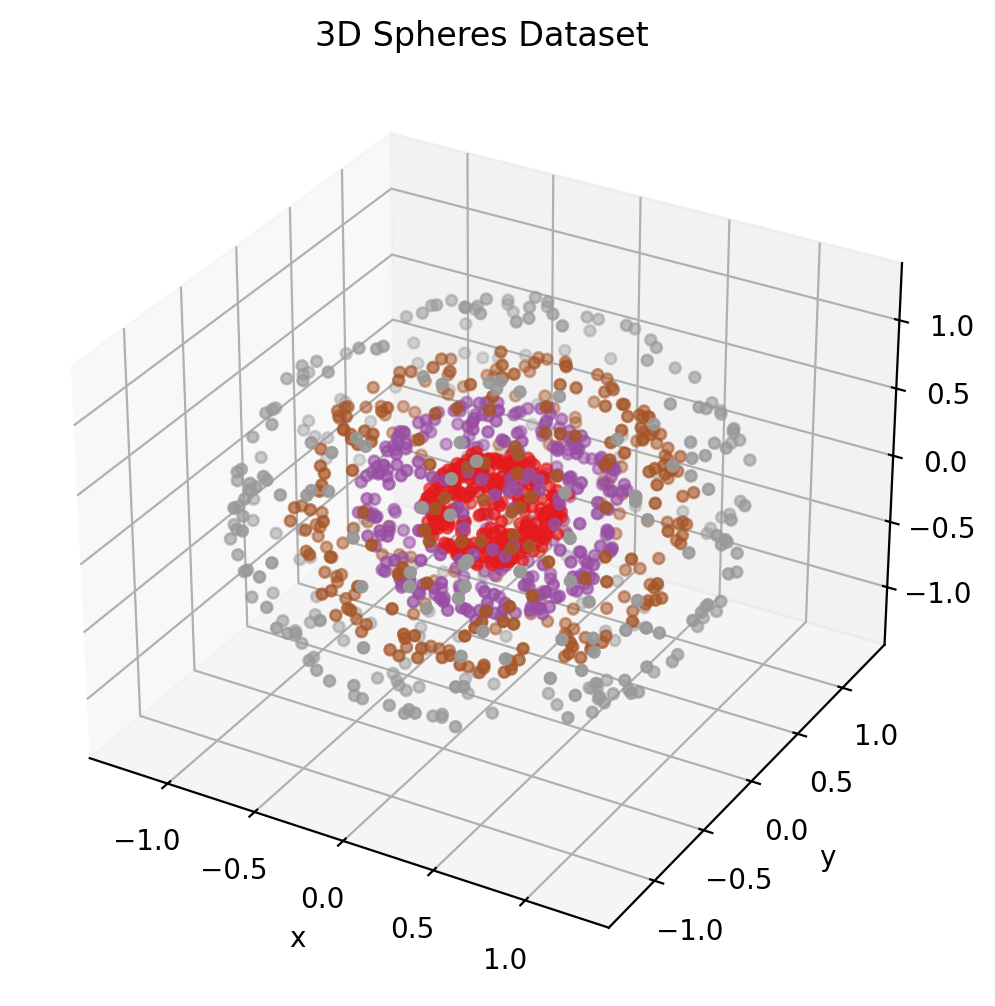

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_spheres_dataset(X, y, title="3D Spheres Dataset"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")
    sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.Set1, s=15)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

plot_spheres_dataset(X3, y3)


Predictions in 3D

Using color points by the network’s prediction instead of true labels to see how well it matches.

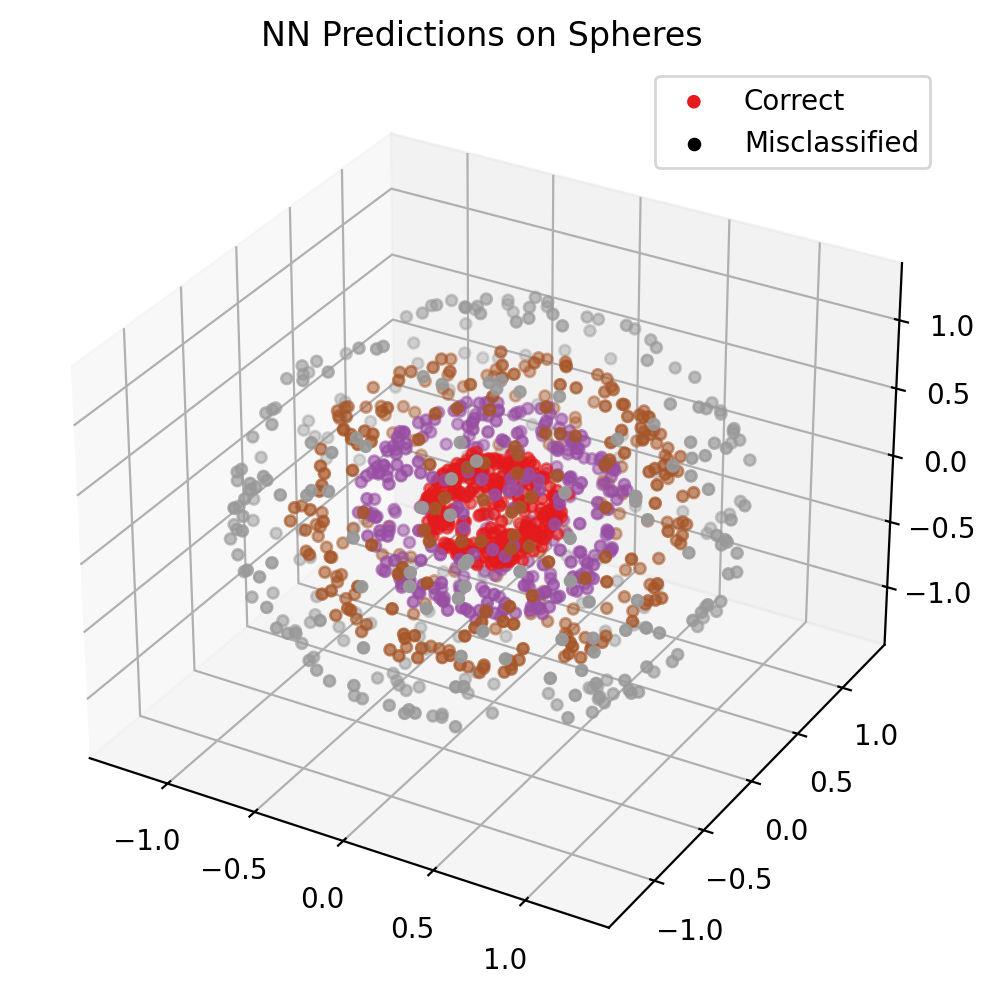

In [43]:
def plot_spheres_predictions(X, y_true, y_pred, title="NN Predictions on Spheres"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")
    # Points correct = same color as true, wrong = black
    correct = (y_true == y_pred)
    ax.scatter(X[correct,0], X[correct,1], X[correct,2], 
               c=y_pred[correct], cmap=plt.cm.Set1, s=15, label="Correct")
    ax.scatter(X[~correct,0], X[~correct,1], X[~correct,2], 
               c="k", s=15, label="Misclassified")
    ax.set_title(title)
    ax.legend()
    plt.show()

plot_spheres_predictions(X3, y3, pred3)
